In [23]:
import json
from pathlib import Path
import pandas as pd
import glob
import os

def extract_confidence_scores_single(json_path):
    """
    Extract ipTM, pTM, and ranking_confidence  from a single scores_rank_001_*.json file.

    Args:
        json_path (str or Path): Full path to the JSON file.

    Returns:
        dict with keys: json_path, iptm, ptm, ranking_confidence, bin, pair_dir
    """
    json_path = Path(json_path)
    with open(json_path) as f:
        data = json.load(f)
    #print(data.keys())
    iptm = data.get("iptm")
    ptm = data.get("ptm")

    if iptm is None or ptm is None:
        return None  # Skip incomplete results

    ranking_conf = 0.8 * iptm + 0.2 * ptm

    parent = json_path.parent.name
    bin_str = parent.split("_bin")[-1]
    try:
        bin_num = int(bin_str)
    except ValueError:
        bin_num = None

    return {
        "json_path": str(json_path),
        "iptm": iptm,
        "ptm": ptm,
        "ranking_confidence": ranking_conf,
        "bin": bin_num,
        "pair_dir": parent
    }

# def extract_confidence_scores_single(json_path):
#     """
#     Extracts ptm and fallback ranking_confidence from a single JSON file
#     when iptm is missing. Assumes ptm is still informative.

#     Args:
#         json_path (str or Path): Full path to scores_rank_001_*.json

#     Returns:
#         dict or None
#     """
#     json_path = Path(json_path)
#     with open(json_path) as f:
#         data = json.load(f)

#     ptm = data.get("ptm")

#     if ptm is None:
#         print(f"[SKIPPED] Missing ptm in: {json_path}")
#         print("Available keys:", list(data.keys()))
#         return None

#     # Use ptm as proxy for ranking_confidence when iptm is unavailable
#     ranking_conf = ptm

#     parent = json_path.parent.name
#     bin_str = parent.split("_bin")[-1]
#     try:
#         bin_num = int(bin_str)
#     except ValueError:
#         bin_num = None

#     return {
#         "json_path": str(json_path),
#         "ptm": ptm,
#         "ranking_confidence": ranking_conf,
#         "bin": bin_num,
#         "pair_dir": parent
#     }

def print_key_from_jsons(folder_path, key, filename_substring):
    """
    Prints the specified key and its value from all JSON files in the folder
    whose filenames contain the given substring.

    Args:
        folder_path (str): Path to the folder containing JSON files.
        key (str): The key to look for in each JSON.
        filename_substring (str): Substring that must be in the filename.
    """
    for filename in os.listdir(folder_path):
        if filename_substring in filename and filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            try:
                with open(file_path, 'r') as f:
                    data = json.load(f)
                if key in data:
                    print(f"{filename} -> {key}: {data[key]}")
                else:
                    print(f"{filename} -> Key '{key}' not found.")
            except (json.JSONDecodeError, IOError) as e:
                print(f"Error reading {filename}: {e}")

In [4]:
from pathlib import Path

json_paths = list(Path("/home/ubuntu/gene_embedding_analysis/alphafold2multimer_ouptuts").rglob("*scores_rank_001_*.json"))

records = []
for path in json_paths:
    result = extract_confidence_scores_single(path)
    if result:
        records.append(result)

df = pd.DataFrame(records)
print(df)
# df.to_csv('RF_ptm_by_binOG.csv')

                                            json_path  iptm   ptm  \
0   /home/ubuntu/gene_embedding_analysis/alphafold...  0.16  0.52   
1   /home/ubuntu/gene_embedding_analysis/alphafold...  0.18  0.40   
2   /home/ubuntu/gene_embedding_analysis/alphafold...  0.15  0.52   
3   /home/ubuntu/gene_embedding_analysis/alphafold...  0.43  0.54   
4   /home/ubuntu/gene_embedding_analysis/alphafold...  0.21  0.55   
5   /home/ubuntu/gene_embedding_analysis/alphafold...  0.85  0.81   
6   /home/ubuntu/gene_embedding_analysis/alphafold...  0.17  0.43   
7   /home/ubuntu/gene_embedding_analysis/alphafold...  0.20  0.22   
8   /home/ubuntu/gene_embedding_analysis/alphafold...  0.45  0.59   
9   /home/ubuntu/gene_embedding_analysis/alphafold...  0.56  0.66   
10  /home/ubuntu/gene_embedding_analysis/alphafold...  0.12  0.39   
11  /home/ubuntu/gene_embedding_analysis/alphafold...  0.40  0.72   
12  /home/ubuntu/gene_embedding_analysis/alphafold...  0.36  0.74   
13  /home/ubuntu/gene_embedding_an

In [ ]:
def json2csv(path, output_file, keyword = "*scores_rank_001_*.json"):
    json_paths = list(Path(path).rglob(keyword))
    print(json_paths)

    records = []
    for path in json_paths:
        result = extract_confidence_scores_single(path)
        if result:
            records.append(result)

    df = pd.DataFrame(records)
    print(df)
    df.to_csv(output_file)

In [ ]:
json2csv('output', 'output_rf_bin_ptm.csv')

[PosixPath('output/pair_17_bin3/TUBGCP4_scores_rank_001_alphafold2_multimer_v3_model_3_seed_000.json'), PosixPath('output/pair_17_bin3/TUBGCP5_scores_rank_001_alphafold2_multimer_v3_model_3_seed_000.json'), PosixPath('output/pair_0_bin0/ZNF713_scores_rank_001_alphafold2_multimer_v3_model_1_seed_000.json'), PosixPath('output/pair_0_bin0/DIPK1C_scores_rank_001_alphafold2_multimer_v3_model_1_seed_000.json'), PosixPath('output/pair_15_bin3/ZNF414_scores_rank_001_alphafold2_multimer_v3_model_1_seed_000.json'), PosixPath('output/pair_15_bin3/SLC25A15_scores_rank_001_alphafold2_multimer_v3_model_1_seed_000.json'), PosixPath('output/pair_10_bin2/FAM219A_scores_rank_001_alphafold2_multimer_v3_model_5_seed_000.json'), PosixPath('output/pair_10_bin2/PPP2R2D_scores_rank_001_alphafold2_multimer_v3_model_1_seed_000.json'), PosixPath('output/pair_5_bin1/LRRCC1_scores_rank_001_alphafold2_multimer_v3_model_5_seed_000.json'), PosixPath('output/pair_5_bin1/SUV39H2_scores_rank_001_alphafold2_multimer_v3_m

In [ ]:
json2csv('output_og', 'output_og_rf_bin_ptm.csv')

[PosixPath('output_og/pair_17_bin3/PEBP1_scores_rank_001_alphafold2_multimer_v3_model_3_seed_000.json'), PosixPath('output_og/pair_17_bin3/RPL13_scores_rank_001_alphafold2_multimer_v3_model_2_seed_000.json'), PosixPath('output_og/pair_0_bin0/L1TD1_scores_rank_001_alphafold2_multimer_v3_model_2_seed_000.json'), PosixPath('output_og/pair_0_bin0/RASGRP4_scores_rank_001_alphafold2_multimer_v3_model_2_seed_000.json'), PosixPath('output_og/pair_15_bin3/NLE1_scores_rank_001_alphafold2_multimer_v3_model_1_seed_000.json'), PosixPath('output_og/pair_15_bin3/DYRK4_scores_rank_001_alphafold2_multimer_v3_model_2_seed_000.json'), PosixPath('output_og/pair_10_bin2/PRCC_scores_rank_001_alphafold2_multimer_v3_model_1_seed_000.json'), PosixPath('output_og/pair_10_bin2/ELOA_scores_rank_001_alphafold2_multimer_v3_model_1_seed_000.json'), PosixPath('output_og/pair_5_bin1/CANT1_scores_rank_001_alphafold2_multimer_v3_model_2_seed_000.json'), PosixPath('output_og/pair_5_bin1/CCDC25_scores_rank_001_alphafold2_

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def ptm_score_boxplot(df):
    #df = pd.read_csv(file)
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='bin', y='ptm')
    plt.title("pTM Score Distribution by Bin")
    plt.xlabel("Probability Bin")
    plt.ylabel("pTM Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('ptm_boxplot.png', dpi = 300)
    plt.show()


    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='bin', y='ptm')
    sns.stripplot(data=df, x='bin', y='ptm', color='black', size=2.5, jitter=0.25)
    plt.title("pTM Scores by Bin with Individual Points")
    plt.xlabel("Probability Bin")
    plt.ylabel("pTM Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
def iptm_score_boxplot(df):
    #df = pd.read_csv(file)
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='bin', y='iptm')
    plt.title("ipTM Score Distribution by Bin")
    plt.xlabel("Probability Bin")
    plt.ylabel("ipTM Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('iptm_boxplot.png', dpi = 300)
    plt.show()


    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='bin', y='iptm')
    sns.stripplot(data=df, x='bin', y='iptm', color='black', size=2.5, jitter=0.25)
    plt.title("ipTM Scores by Bin with Individual Points")
    plt.xlabel("Probability Bin")
    plt.ylabel("ipTM Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

def ranking_confidence_score_boxplot(df):
    #df = pd.read_csv(file)
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='bin', y='ranking_confidence')
    plt.title("Ranking Confidence Score Distribution by Bin")
    plt.xlabel("Probability Bin")
    plt.ylabel("Ranking Confidence Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('ranking_confidence_boxplot.png', dpi = 300)
    plt.show()


    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='bin', y='ranking_confidence')
    sns.stripplot(data=df, x='bin', y='ranking_confidence', color='black', size=2.5, jitter=0.25)
    plt.title("Ranking Confidence Scores by Bin with Individual Points")
    plt.xlabel("Probability Bin")
    plt.ylabel("Ranking Confidence Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [26]:
df.to_csv('100_cilia_preds.csv')

In [29]:
! pwd

/home/ubuntu/gene_embedding_analysis


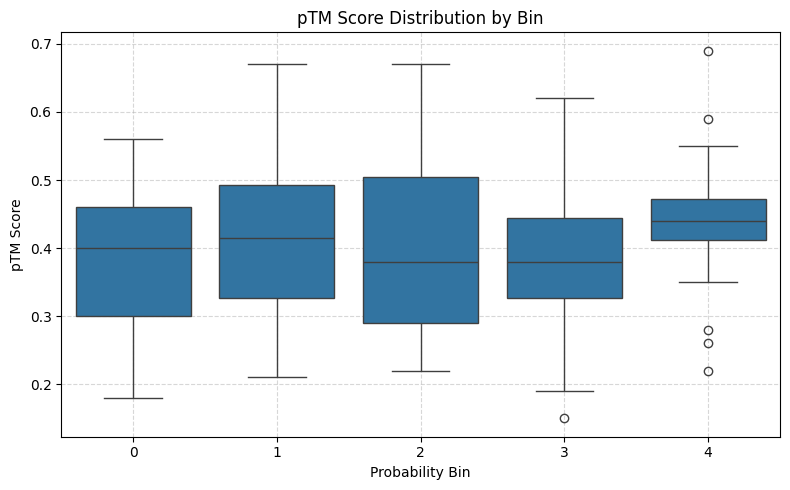

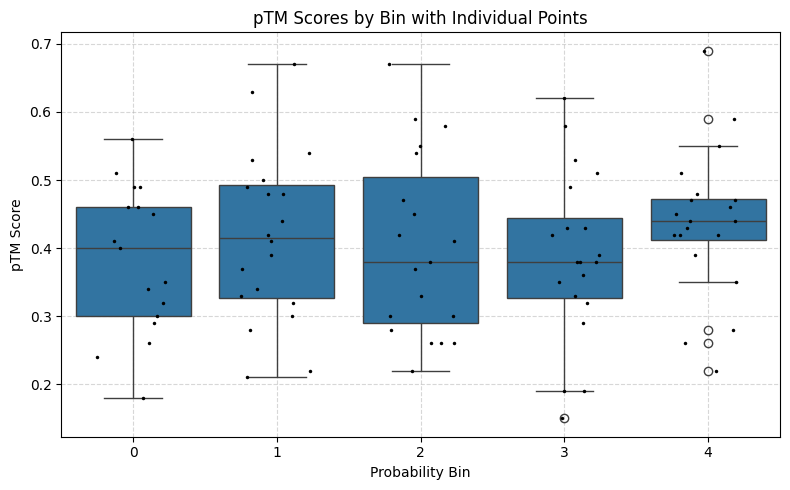

In [24]:
ptm_score_boxplot(df)

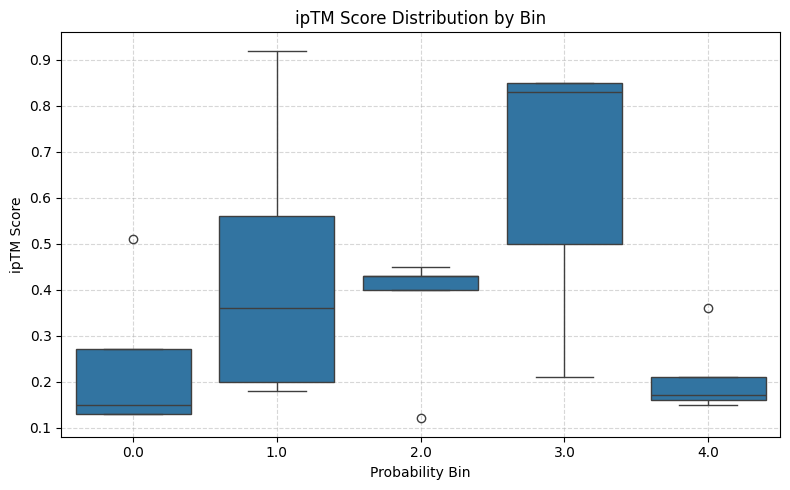

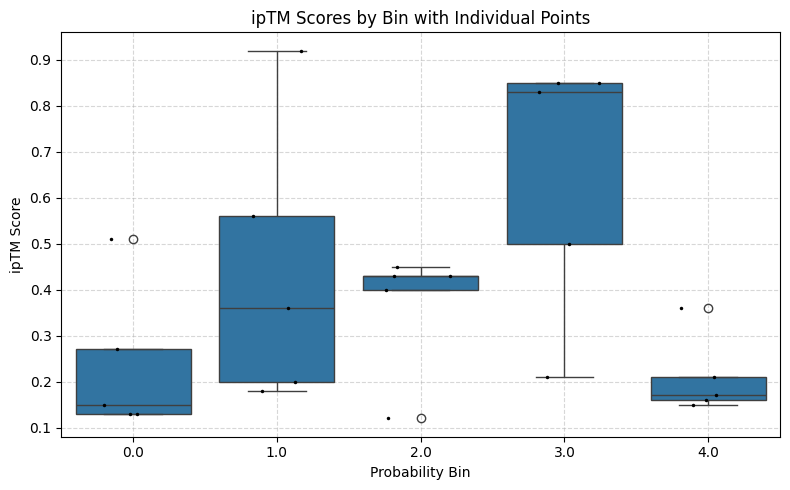

In [15]:
iptm_score_boxplot(df)

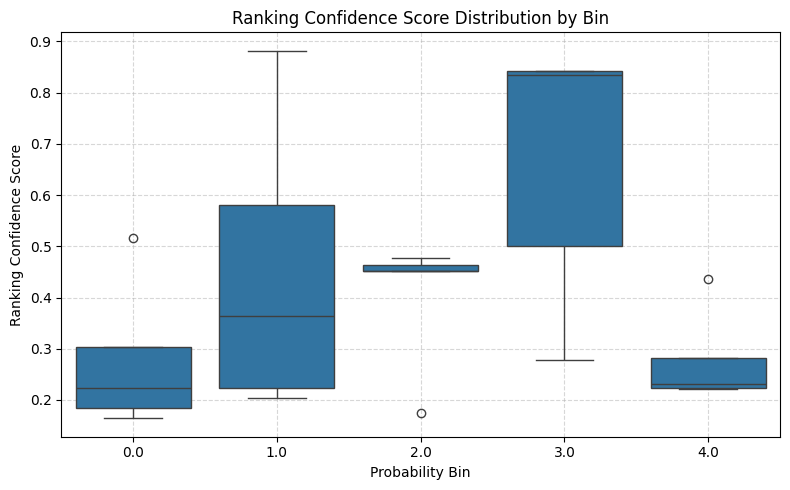

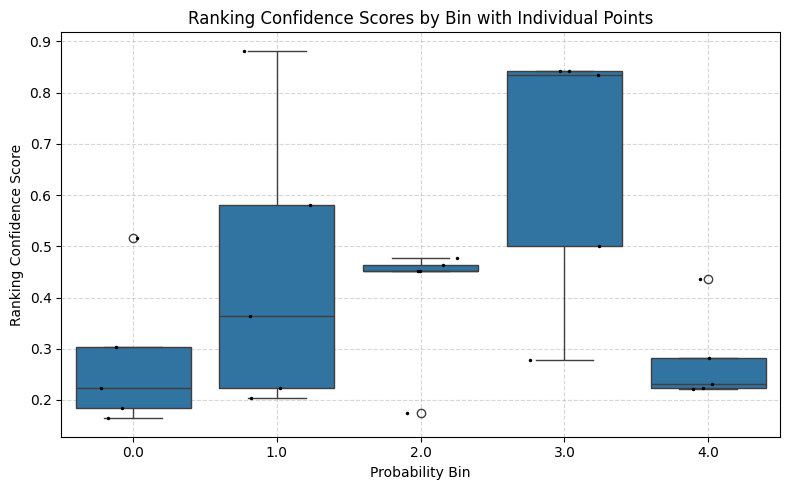

In [16]:
ranking_confidence_score_boxplot(df)

In [27]:
from pathlib import Path

json_paths = list(Path("/home/ubuntu/colabfold_ouptuts_cilia").rglob("*scores_rank_001_*.json"))

records = []
for path in json_paths:
    result = extract_confidence_scores_single(path)
    if result:
        records.append(result)

df = pd.DataFrame(records)
print(df)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7b5c94af2340>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/scgpt_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7b5c94af2340>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/scgpt_conda/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7b5c94af2340>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/scgpt_conda/lib/python3.9/site-packag

KeyboardInterrupt: 

In [28]:
df

,json_path,iptm,ptm,ranking_confidence,bin,pair_dir
0,/home/ubuntu/colabfold_ouptuts_cilia/pair_51_b...,0.14,0.67,0.246,2,pair_51_bin2
1,/home/ubuntu/colabfold_ouptuts_cilia/pair_90_b...,0.14,0.42,0.196,4,pair_90_bin4
2,/home/ubuntu/colabfold_ouptuts_cilia/pair_21_b...,0.14,0.37,0.186,1,pair_21_bin1
3,/home/ubuntu/colabfold_ouptuts_cilia/pair_80_b...,0.14,0.28,0.168,4,pair_80_bin4
4,/home/ubuntu/colabfold_ouptuts_cilia/pair_49_b...,0.10,0.30,0.140,2,pair_49_bin2
...,...,...,...,...,...,...
91,/home/ubuntu/colabfold_ouptuts_cilia/pair_0_bi...,0.46,0.51,0.470,0,pair_0_bin0
92,/home/ubuntu/colabfold_ouptuts_cilia/pair_20_b...,0.15,0.54,0.228,1,pair_20_bin1
93,/home/ubuntu/colabfold_ouptuts_cilia/pair_8_bi...,0.21,0.34,0.236,0,pair_8_bin0
94,/home/ubuntu/colabfold_ouptuts_cilia/pair_73_b...,0.13,0.35,0.174,3,pair_73_bin3


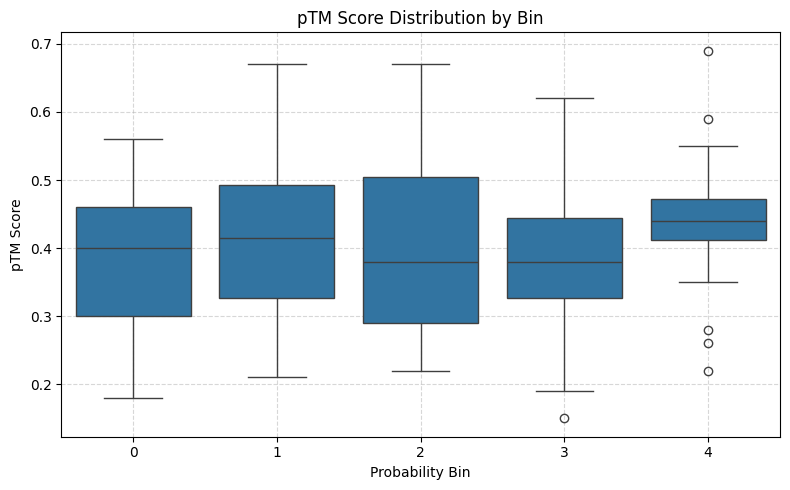

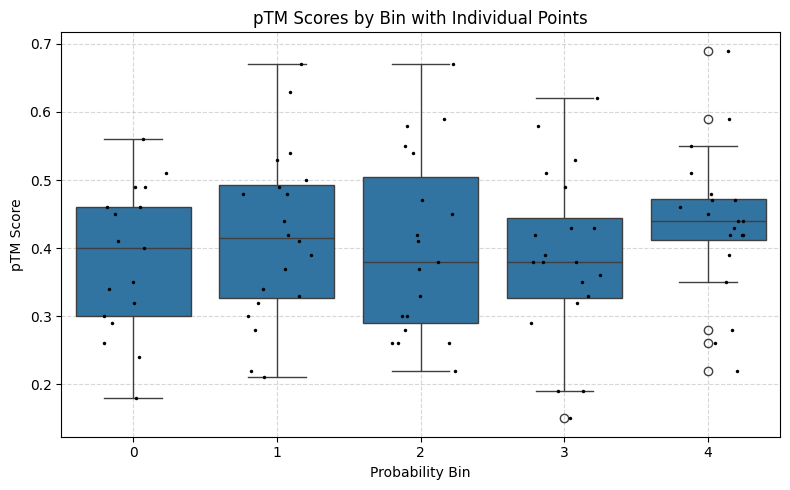

In [20]:
ptm_score_boxplot(df)

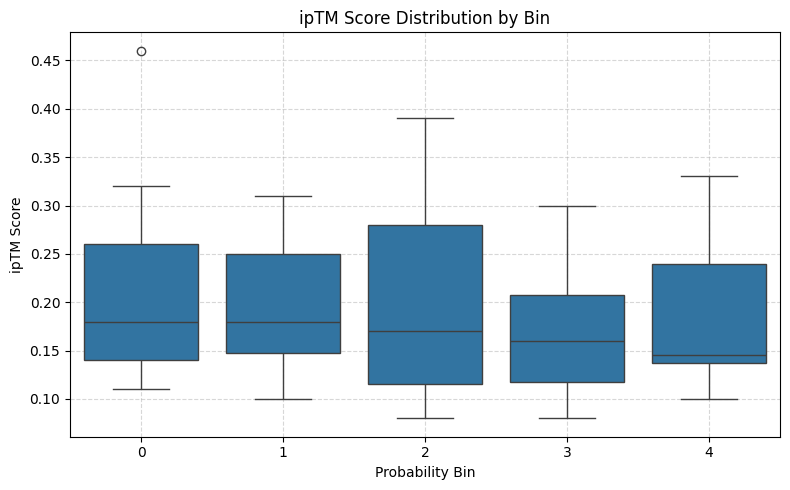

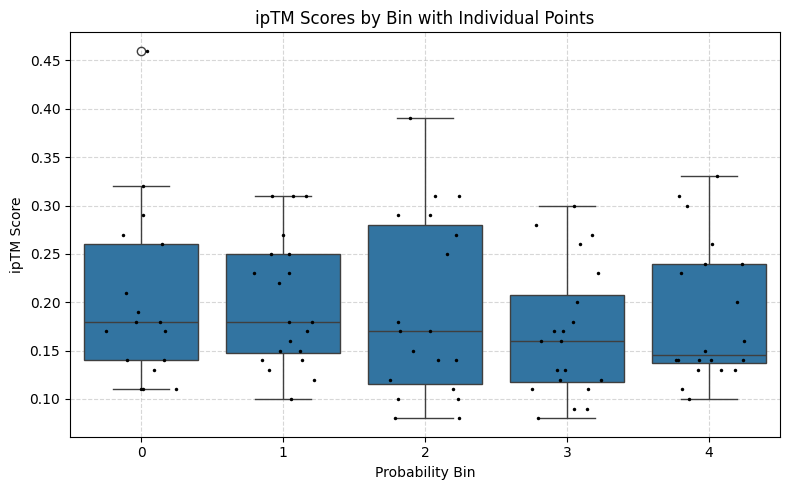

In [21]:
iptm_score_boxplot(df)

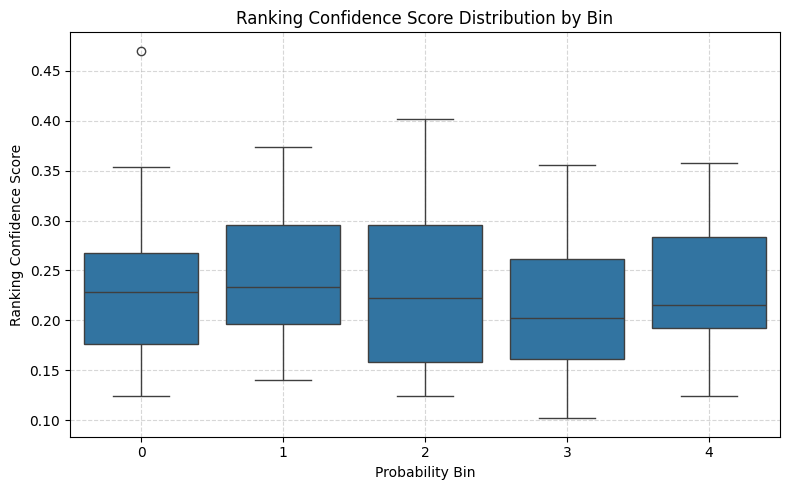

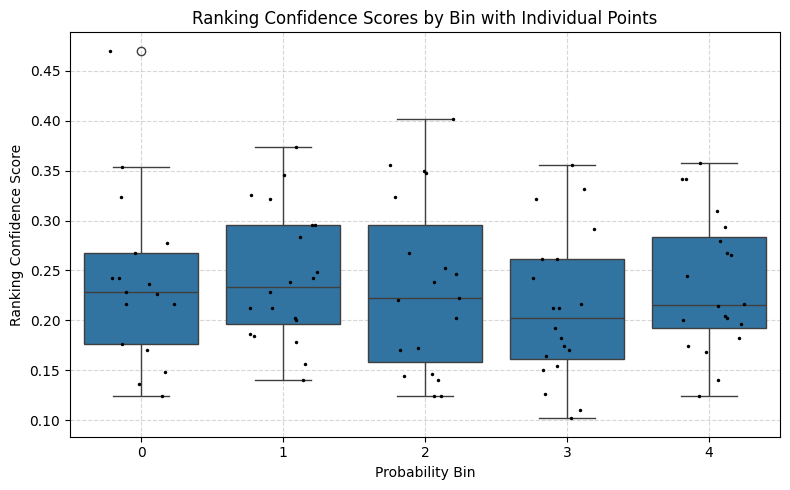

In [22]:
ranking_confidence_score_boxplot(df)

In [ ]:
df = pd.read_csv('output_og_rf_bin_ptm.csv')

In [ ]:
import pandas as pd
import numpy as np

# Make a copy to avoid SettingWithCopyWarning
df_clean = df[df['bin'].notna()].copy()

# Split bin 2 randomly into two halves
bin2_df = df_clean[df_clean['bin'] == 2.0]
bin2_half_size = len(bin2_df) // 2
bin2_shuffled = bin2_df.sample(frac=1, random_state=42)  # Shuffle with reproducibility

bin2_class0 = bin2_shuffled.iloc[:bin2_half_size]
bin2_class1 = bin2_shuffled.iloc[bin2_half_size:]

# Get rows for bins 0 and 1
class0_df = df_clean[df_clean['bin'].isin([0.0, 1.0])]
# Get rows for bins 3 and 4
class1_df = df_clean[df_clean['bin'].isin([3.0, 4.0])]

# Combine to form two classes
df_class0 = pd.concat([class0_df, bin2_class0], ignore_index=True)
df_class1 = pd.concat([class1_df, bin2_class1], ignore_index=True)

# Add label columns
df_class0['binary_class'] = 0
df_class1['binary_class'] = 1

# Combine the final dataframe
df_final = pd.concat([df_class0, df_class1], ignore_index=True)

# Optionally shuffle the final dataframe
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

def boxplot(df):
    plt.figure(figsize=(8, 5))

    # Plot the boxplot
    sns.boxplot(data=df, x='binary_class', y='ptm')

    # Perform t-test
    group0 = df[df['binary_class'] == 0]['ptm']
    group1 = df[df['binary_class'] == 1]['ptm']
    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)  # Welch's t-test

    # Add title and labels
    plt.title("PTM Score Distribution by Binary Class")
    plt.xlabel("Binary Class")
    plt.ylabel("PTM Score")
    plt.grid(True, linestyle='--', alpha=0.5)

    # Save and show plot
    plt.tight_layout()
    plt.savefig('binary_boxplot.png', dpi=300)
    plt.show()

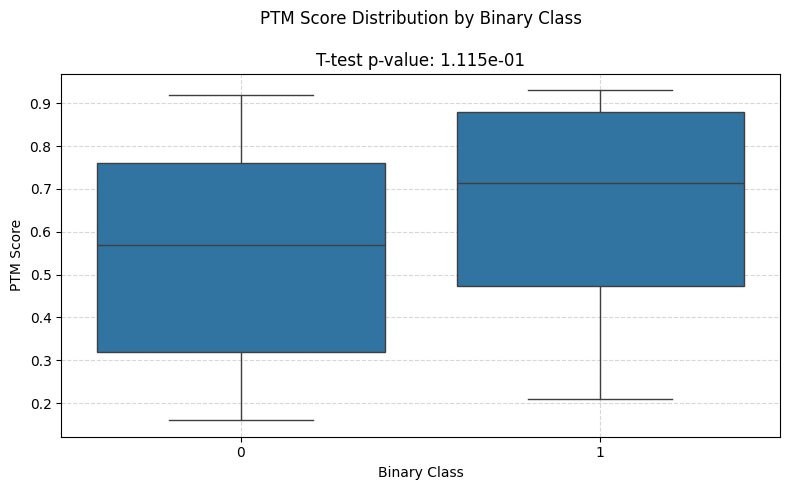

In [ ]:
boxplot(df_final)

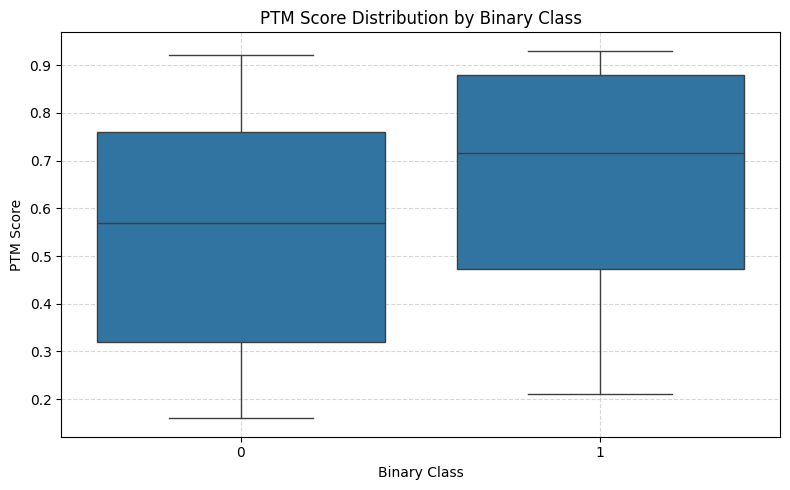

In [ ]:
boxplot(df_final)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

def ptm_score_boxplot(file):
    df = pd.read_csv(file)

    # Drop rows with missing 'bin' or 'ptm' values
    df = df.dropna(subset=['bin', 'ptm'])

    # Prepare data for ANOVA
    grouped_scores = [group['ptm'].values for _, group in df.groupby('bin')]
    f_stat, p_val = f_oneway(*grouped_scores)

    # Plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='bin', y='ptm')

    # Annotate with ANOVA p-value
    plt.title(f"PTM Score Distribution by Bin")
    plt.xlabel("Probability Bin")
    plt.ylabel("PTM Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f'{file[:-4]}_boxplot.png', dpi=300)
    plt.show()


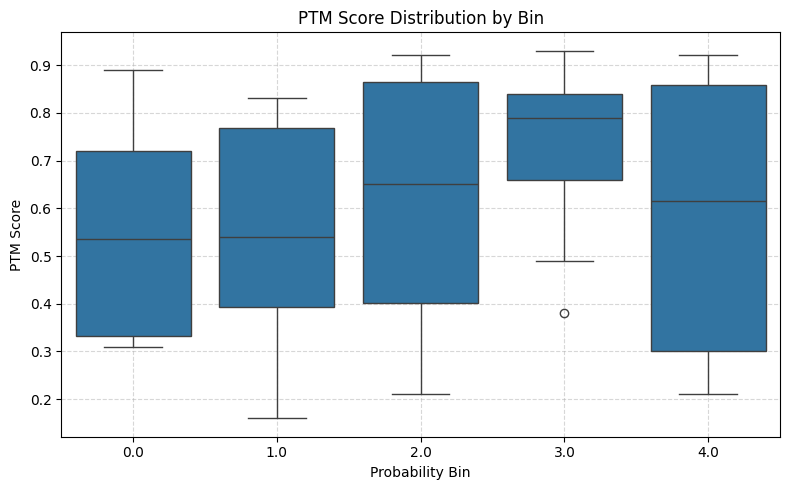

In [ ]:
ptm_score_boxplot('output_og_rf_bin_ptm.csv')

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0   -0.011    1.0 -0.3223 0.3003  False
   0.0    2.0    0.063  0.978 -0.2483 0.3743  False
   0.0    3.0    0.167 0.5774 -0.1528 0.4868  False
   0.0    4.0    0.031 0.9985 -0.2803 0.3423  False
   1.0    2.0    0.074 0.9606 -0.2373 0.3853  False
   1.0    3.0    0.178  0.516 -0.1418 0.4978  False
   1.0    4.0    0.042 0.9952 -0.2693 0.3533  False
   2.0    3.0    0.104 0.8858 -0.2158 0.4238  False
   2.0    4.0   -0.032 0.9983 -0.3433 0.2793  False
   3.0    4.0   -0.136  0.746 -0.4558 0.1838  False
---------------------------------------------------


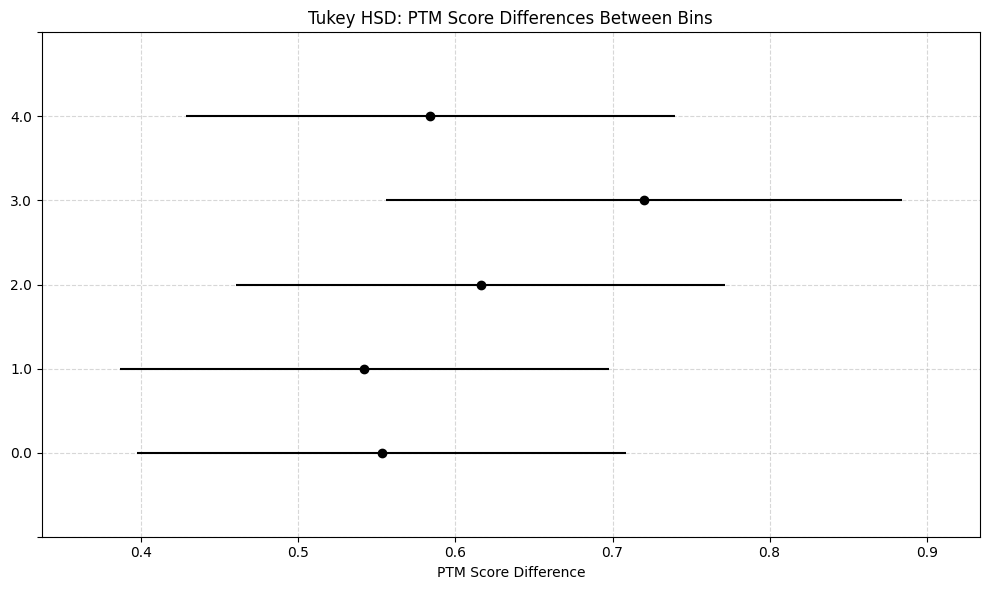

In [ ]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Read your data
df = pd.read_csv('output_og_rf_bin_ptm.csv')  # replace with your actual file
df = df.dropna(subset=["bin", "ptm"])  # clean up missing values

# Run Tukey's HSD
tukey_result = pairwise_tukeyhsd(endog=df['ptm'], groups=df['bin'], alpha=0.05)

# Print results
print(tukey_result)

# Optional: plot the results
tukey_result.plot_simultaneous()
plt.title("Tukey HSD: PTM Score Differences Between Bins")
plt.xlabel("PTM Score Difference")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("tukey_ptm_bin_diff.png", dpi=300)
plt.show()
